# Lab | Data Structuring and Combining Data

## Challenge 1: Combining & Cleaning Data

In this challenge, we will be working with the customer data from an insurance company, as we did in the two previous labs. The data can be found here:
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv

But this time, we got new data, which can be found in the following 2 CSV files located at the links below.

- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file2.csv
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file3.csv

Note that you'll need to clean and format the new data.

Observation:
- One option is to first combine the three datasets and then apply the cleaning function to the new combined dataset
- Another option would be to read the clean file you saved in the previous lab, and just clean the two new files and concatenate the three clean datasets

In [1]:
import pandas as pd

df1 = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file2.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file3.csv")


In [2]:
def clean_data(df):
    # Example cleaning steps (adapt based on your last lab)
    df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")
    df = df.drop_duplicates()
    df = df.dropna(how="all")
    return df

df1_clean = clean_data(df1)
df2_clean = clean_data(df2)
df3_clean = clean_data(df3)


In [3]:
combined_df = pd.concat([df1_clean, df2_clean, df3_clean], ignore_index=True)


In [4]:
print(combined_df.info())
print(combined_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9137 entries, 0 to 9136
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   9137 non-null   object 
 1   st                         2067 non-null   object 
 2   gender                     9015 non-null   object 
 3   education                  9137 non-null   object 
 4   customer_lifetime_value    9130 non-null   object 
 5   income                     9137 non-null   float64
 6   monthly_premium_auto       9137 non-null   float64
 7   number_of_open_complaints  9137 non-null   object 
 8   policy_type                9137 non-null   object 
 9   vehicle_class              9137 non-null   object 
 10  total_claim_amount         9137 non-null   float64
 11  state                      7070 non-null   object 
dtypes: float64(3), object(9)
memory usage: 856.7+ KB
None
  customer          st gender             educatio

# Challenge 2: Structuring Data

In this challenge, we will continue to work with customer data from an insurance company, but we will use a dataset with more columns, called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis_clean.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by performing data cleaning, formatting, and structuring.

In [5]:
# load dataset
url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv"
df = pd.read_csv(url)

print(df.head())   # quick preview
print(df.columns)  # check column names

# total revenue by sales channel
sales_summary = pd.pivot_table(
    df,
    values="Total Claim Amount",   # revenue column
    index="Sales Channel",
    aggfunc="sum"
).round(2)

print(sales_summary)

# top revenue channel
top_channel = sales_summary["Total Claim Amount"].idxmax()
print("Top sales channel:", top_channel)

# average CLV by gender + education
clv_summary = pd.pivot_table(
    df,
    values="Customer Lifetime Value",
    index="Gender",
    columns="Education",
    aggfunc="mean"
).round(2)

print(clv_summary)


   Unnamed: 0 Customer       State  Customer Lifetime Value Response  \
0           0  DK49336     Arizona              4809.216960       No   
1           1  KX64629  California              2228.525238       No   
2           2  LZ68649  Washington             14947.917300       No   
3           3  XL78013      Oregon             22332.439460      Yes   
4           4  QA50777      Oregon              9025.067525       No   

   Coverage Education Effective To Date EmploymentStatus Gender  ...  \
0     Basic   College           2/18/11         Employed      M  ...   
1     Basic   College           1/18/11       Unemployed      F  ...   
2     Basic  Bachelor           2/10/11         Employed      M  ...   
3  Extended   College           1/11/11         Employed      M  ...   
4   Premium  Bachelor           1/17/11    Medical Leave      F  ...   

   Number of Open Complaints Number of Policies     Policy Type        Policy  \
0                        0.0                  9  Corp

1. You work at the marketing department and you want to know which sales channel brought the most sales in terms of total revenue. Using pivot, create a summary table showing the total revenue for each sales channel (branch, call center, web, and mail).
Round the total revenue to 2 decimal points.  Analyze the resulting table to draw insights.

2. Create a pivot table that shows the average customer lifetime value per gender and education level. Analyze the resulting table to draw insights.

   Unnamed: 0 Customer       State  Customer Lifetime Value Response  \
0           0  DK49336     Arizona              4809.216960       No   
1           1  KX64629  California              2228.525238       No   
2           2  LZ68649  Washington             14947.917300       No   
3           3  XL78013      Oregon             22332.439460      Yes   
4           4  QA50777      Oregon              9025.067525       No   

   Coverage Education Effective To Date EmploymentStatus Gender  ...  \
0     Basic   College           2/18/11         Employed      M  ...   
1     Basic   College           1/18/11       Unemployed      F  ...   
2     Basic  Bachelor           2/10/11         Employed      M  ...   
3  Extended   College           1/11/11         Employed      M  ...   
4   Premium  Bachelor           1/17/11    Medical Leave      F  ...   

   Number of Open Complaints Number of Policies     Policy Type        Policy  \
0                        0.0                  9  Corp

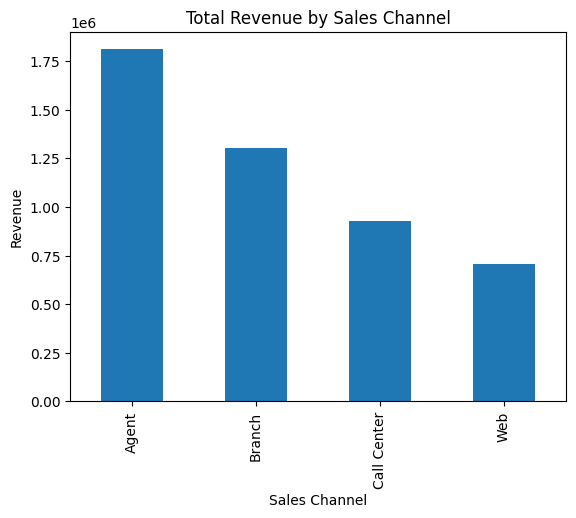

Top sales channel: Agent
Education  Bachelor  College   Doctor  High School or Below   Master
Gender                                                              
F           7874.27  7748.82  7328.51               8675.22  8157.05
M           7703.60  8052.46  7415.33               8149.69  8168.83


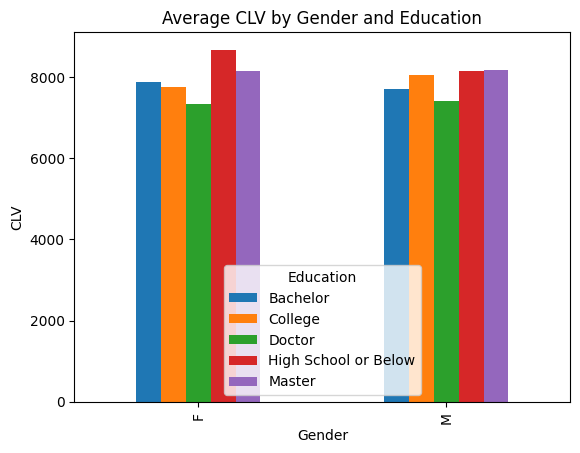

In [6]:
import matplotlib.pyplot as plt

# load dataset
url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv"
df = pd.read_csv(url)

print(df.head())   # preview
print(df.columns)  # check column names

# total revenue by sales channel
sales_summary = pd.pivot_table(
    df,
    values="Total Claim Amount",   # revenue column
    index="Sales Channel",
    aggfunc="sum"
).round(2)

print(sales_summary)

# bar chart: revenue by channel
sales_summary.plot(kind="bar", legend=False, title="Total Revenue by Sales Channel")
plt.ylabel("Revenue")
plt.show()

# top revenue channel
top_channel = sales_summary["Total Claim Amount"].idxmax()
print("Top sales channel:", top_channel)

# average CLV by gender + education
clv_summary = pd.pivot_table(
    df,
    values="Customer Lifetime Value",
    index="Gender",
    columns="Education",
    aggfunc="mean"
).round(2)

print(clv_summary)

# bar chart: average CLV by gender & education
clv_summary.plot(kind="bar", title="Average CLV by Gender and Education")
plt.ylabel("CLV")
plt.show()


## Bonus

You work at the customer service department and you want to know which months had the highest number of complaints by policy type category. Create a summary table showing the number of complaints by policy type and month.
Show it in a long format table.

*In data analysis, a long format table is a way of structuring data in which each observation or measurement is stored in a separate row of the table. The key characteristic of a long format table is that each column represents a single variable, and each row represents a single observation of that variable.*

*More information about long and wide format tables here: https://www.statology.org/long-vs-wide-data/*

C:\Users\noidf\AppData\Local\Temp\ipykernel_24564\246590333.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Effective To Date"] = pd.to_datetime(df["Effective To Date"])


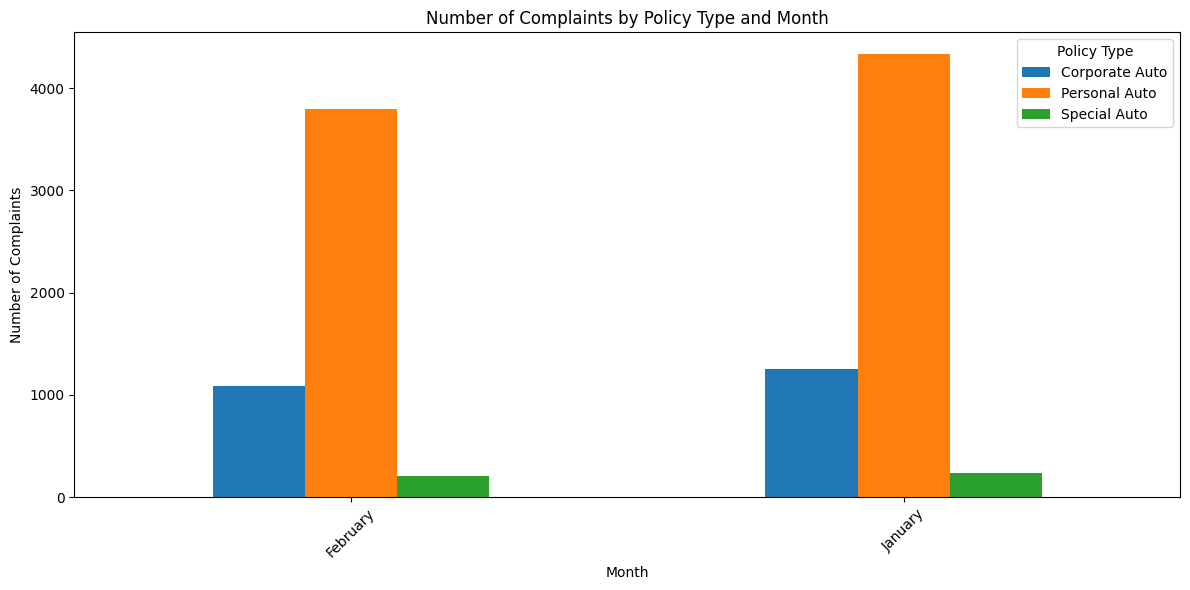

In [8]:

# 1. Load the dataset
url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv"
df = pd.read_csv(url)

# 2. Convert 'Effective To Date' into datetime format
df["Effective To Date"] = pd.to_datetime(df["Effective To Date"])

# 3. Extract the month name
df["Month"] = df["Effective To Date"].dt.month_name()

# 4. Group by Policy Type and Month to count complaints
complaints_summary = df.groupby(["Policy Type", "Month"]).size().reset_index(name="Num_Complaints")

# 5. Sort the months in calendar order (Jan → Dec)
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
complaints_summary["Month"] = pd.Categorical(complaints_summary["Month"], categories=month_order, ordered=True)

# 6. Pivot the table so months are on x-axis, policy types as groups
pivot_table = complaints_summary.pivot(index="Month", columns="Policy Type", values="Num_Complaints")

# 7. Plot a bar chart
pivot_table.plot(kind="bar", figsize=(12,6))

plt.title("Number of Complaints by Policy Type and Month")
plt.xlabel("Month")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.legend(title="Policy Type")
plt.tight_layout()
plt.show()
